In [1]:
import numpy as np #Numpy(보통 "넘파이"라고 발음)는 수치 해석용 Python 패키지이다. 다차원의 행렬 자료구조인 ndarray를 지원하여 벡터와 행렬을 사용하는 선형대수 계산에 주로 사용된다.
import pandas as pd #판다스(pandas)는 파이썬 언어로 작성된 데이터를 분석 및 조작하기 위한 소프트웨어 라이브러리이다. 
import matplotlib.pyplot as plt #matplotlib에서 가장 자주 사용하는 함수(메서드) # matplotlib은 데이터를 다양한 그래프로 만들어주는 파이썬 라이브러리 (데이터 시각화)
import seaborn as sns #seaborn은 matplotlib의 상위 호환 데이터 시각화를 위한 라이브러리이다.

plt.style.use('seaborn')
sns.set(font_scale=2.5) #이 두줄은 본 필자가 항상 쓰는 방법이다. matplotlib의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph의 font size를 지정할 필요 없이 seaborn의 font_scale을 사용하면 편합니다.
import missingno as msno #결측데이터들을 파악하는데 직관적인 도움을 주는 패키지

import warnings 
warnings.filterwarnings('ignore') #경고창 숨기기. upyternotebook(또는 ipython)에서 경고 메시지를 무시하고 싶을 때 사용

%matplotlib inline

### numpy

Numpy(보통 "넘파이"라고 발음)는 수치 해석용 Python 패키지이다.

다차원의 행렬 자료구조인 ndarray를 지원하여 벡터와 행렬을 사용하는 선형대수 계산에 주로 사용된다.

### pandas

판다스(pandas)는 파이썬 언어로 작성된 데이터를 분석 및 조작하기 위한 소프트웨어 라이브러리

### matplotlib

데이터를 다양한 그래프로 만들어주는 파이썬 라이브러리 (데이터 시각화)

matplotlib의 pyplot을 이용

### matplotlib.pyplot 모듈

matplotlib에서 가장 자주 사용하는 함수(메서드)

### missingno

결측데이터들을 파악하는데 직관적인 도움을 주는 패키지

### %matplotlib inline

Jupyer notebook을 실행한 브라우저에서 그림을 볼 수 있도록, 브라우저 내부(Inline)에 그려지도록 하는 코드

이는 **도표, 그래프, 그림, 소리, 애니메이션 등과 같은 산출물(Rich output)**을 표현하는 방법 중 하나이다.

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv') 
df_test = pd.read_csv('../input/titanic/test.csv')

# pd.read_csv('경로/불러올파일명.csv')

In [3]:
df_train.head() #데이터 상위 행 반환

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe() #통계치 확인

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0])) #\t : 탭 (Tab)
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [7]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


### {:>10}

오른쪽 정렬

### {:.2f}

소수점 둘째자리까지 출력

### df_train[col].isnull().sum()

해당 열의 결측치가 몇개인지 알 수 있게하는 문장 (TRUE=1(결측치), FALSE=0으로 계산)

### df_train[col].shape[0]

해당 열의 차원 (열이 지정되어 있으므로 행의 갯수를 보여줌)

### 100 * (df_train[col].isnull().sum()/df_train[col].shape[0])

100 * (결측치/전체 데이터)를 의미.

%를 출력해주는 문장


<AxesSubplot:>

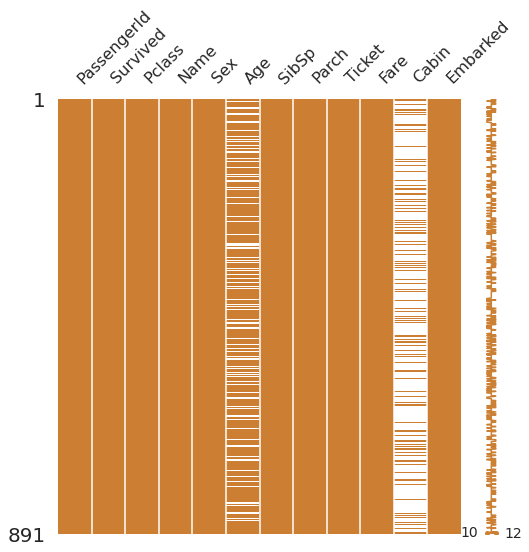

In [8]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

### matrix() 함수

행렬을 생성

ㄴR언어 → 데이터 벡터를 데이터 행렬로 변환



<AxesSubplot:>

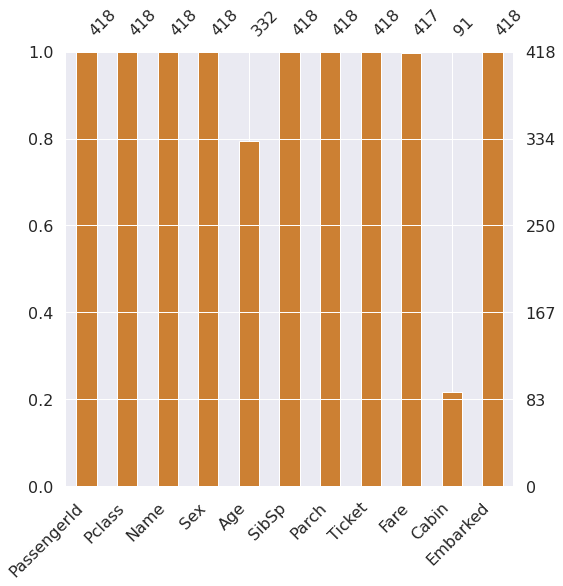

In [9]:
msno.bar(df=df_test.iloc[:,:], figsize = (8,8), color=(0.8, 0.5, 0.2)) #bar(막대를 표시할 위치, 막대의 높이)

### .iloc[position]

위치 정소를 기반으로 인덱싱을 한다.

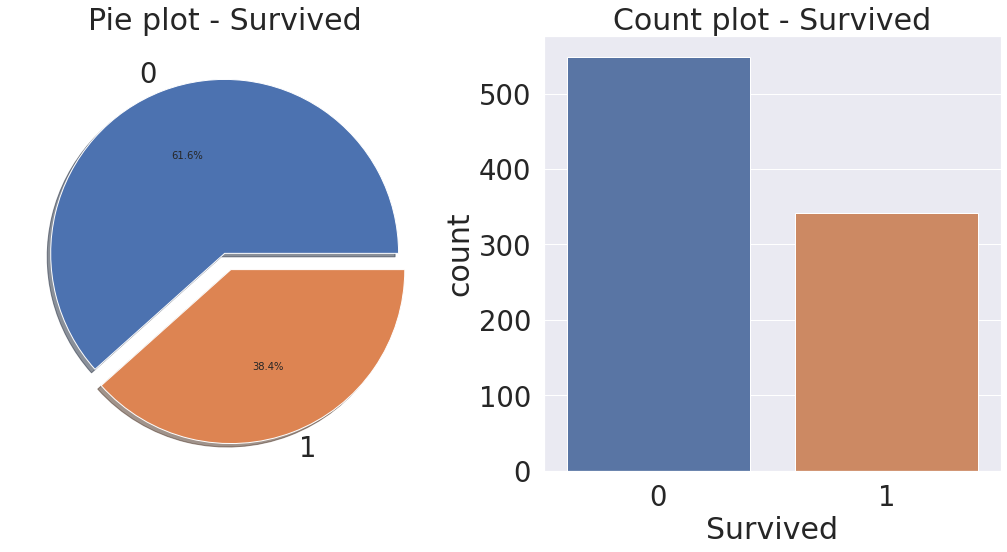

In [10]:

f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

### autopct

파이조각의 전체 대비 백분율

### plt.subplots() 함수

함수 내에 y,x 방향으로 몇 개의 격자를 만들 것인지를 지정하면 다양한 형태의 격자를 만들 수 있다.

- figure 및 axes 객체를 포함하는 튜플을 반환하는 함수

# figsize(가로길이, 세로길이)

In [11]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


# as_index=True 
; 이 그룹을 인덱스로 지정할 것인지 여부

In [12]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [13]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


#  pd.crosstab() : 교차일람표
 - 교차표는 그룹의 빈도를 계산하기 위한 피벗테이블의 한 유형이다.
- crosstab의 처음 두 인자는 배열이나 시리즈 혹은 배열의 리스트가 올 수 있다.
  (첫번째 들어가는 것 → 인덱스, 두번째 들어가는 것 → 컬럼)   
- 총합을 보고 싶다면 margins 사용 (ex. margins = True)

<AxesSubplot:xlabel='Pclass'>

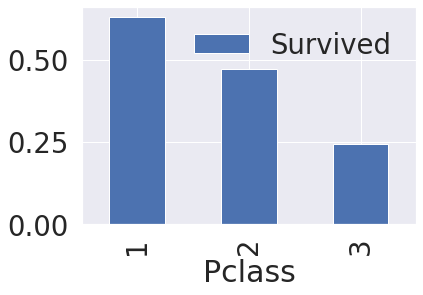

In [14]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

# groupby

- 같은 값을 하나로 묶어 통계 또는 집계 결과를 얻기 위해 사용하는 것
- 조건부로 집계하고 싶은 경우 활용
- 평균값을 구해주는 메서드로 **mean**을 사용

### ascending = False

내림차순 정렬

ascending : 오름차순

### sort_values 메서드

객체를 값에 따라 정렬할 경우 이용

기본적으로 오름차순으로 정렬

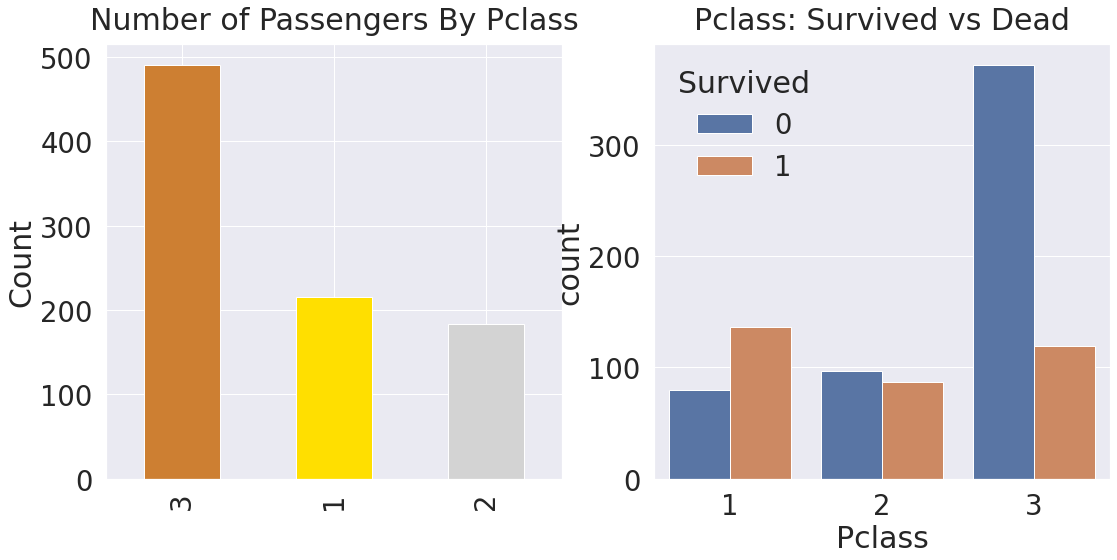

In [15]:
y_position = 1.02 #타이틀이 그래프 위에 얼마나 떨어졌는지 정하는 상수 값
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

### countplot() 함수

각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.

데이터프레임에만 사용할 수 있다.

countplot(x=”column_name”, data=data_frame)

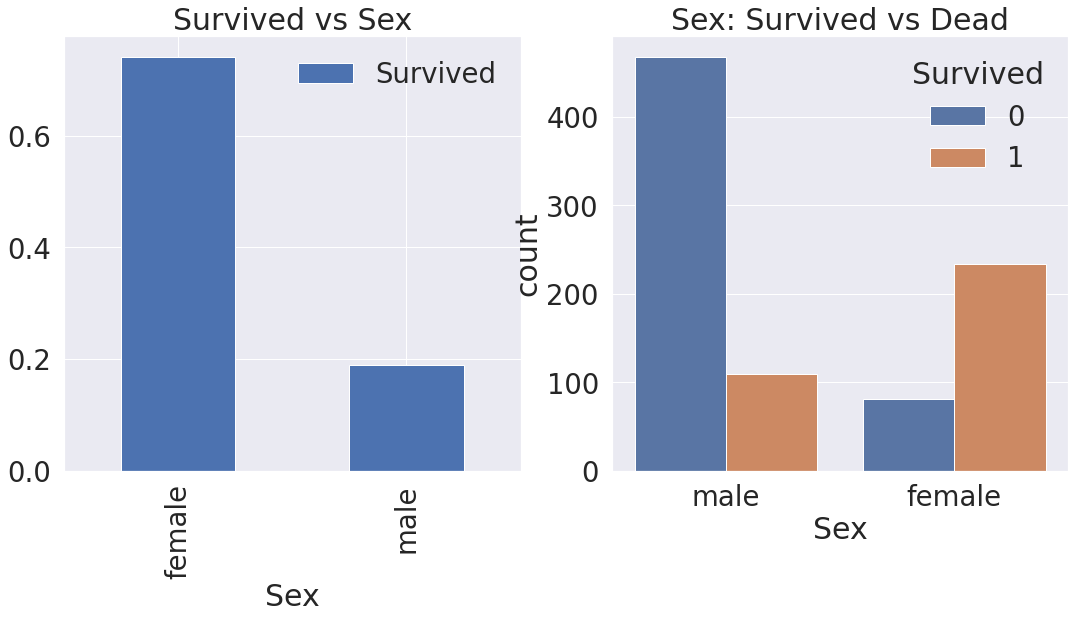

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

### countplot() 함수

각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.

데이터프레임에만 사용할 수 있다.

countplot(x=”column_name”, data=data_frame)

In [17]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


#as_index=False

이 그룹을 인덱스로 지정할 것인지 여부

In [18]:
pd.crosstab(df_train['Sex'], df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### pd.crosstab() : 교차일람표

- 교차표는 그룹의 빈도를 계산하기 위한 피벗테이블의 한 유형이다.
- crosstab의 처음 두 인자는 배열이나 시리즈 혹은 배열의 리스트가 올 수 있다.
    
    (첫번째 들어가는 것 → 인덱스, 두번째 들어가는 것 → 컬럼)
    
- 총합을 보고 싶다면 margins 사용 (ex. margins = True)

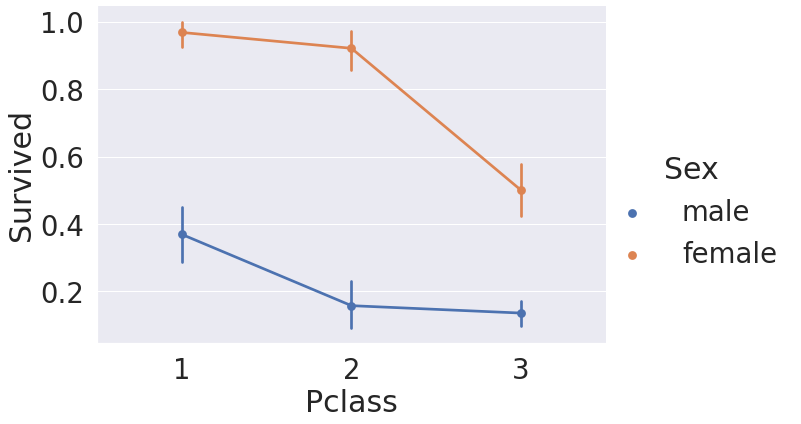

In [19]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

# sns.factorplot(x, y, hue)

y평균값 그래프

hue로 지정된 필드의 종류만큼 라인이 그려짐

### aspect

종횡비

가로와 세로의 비율

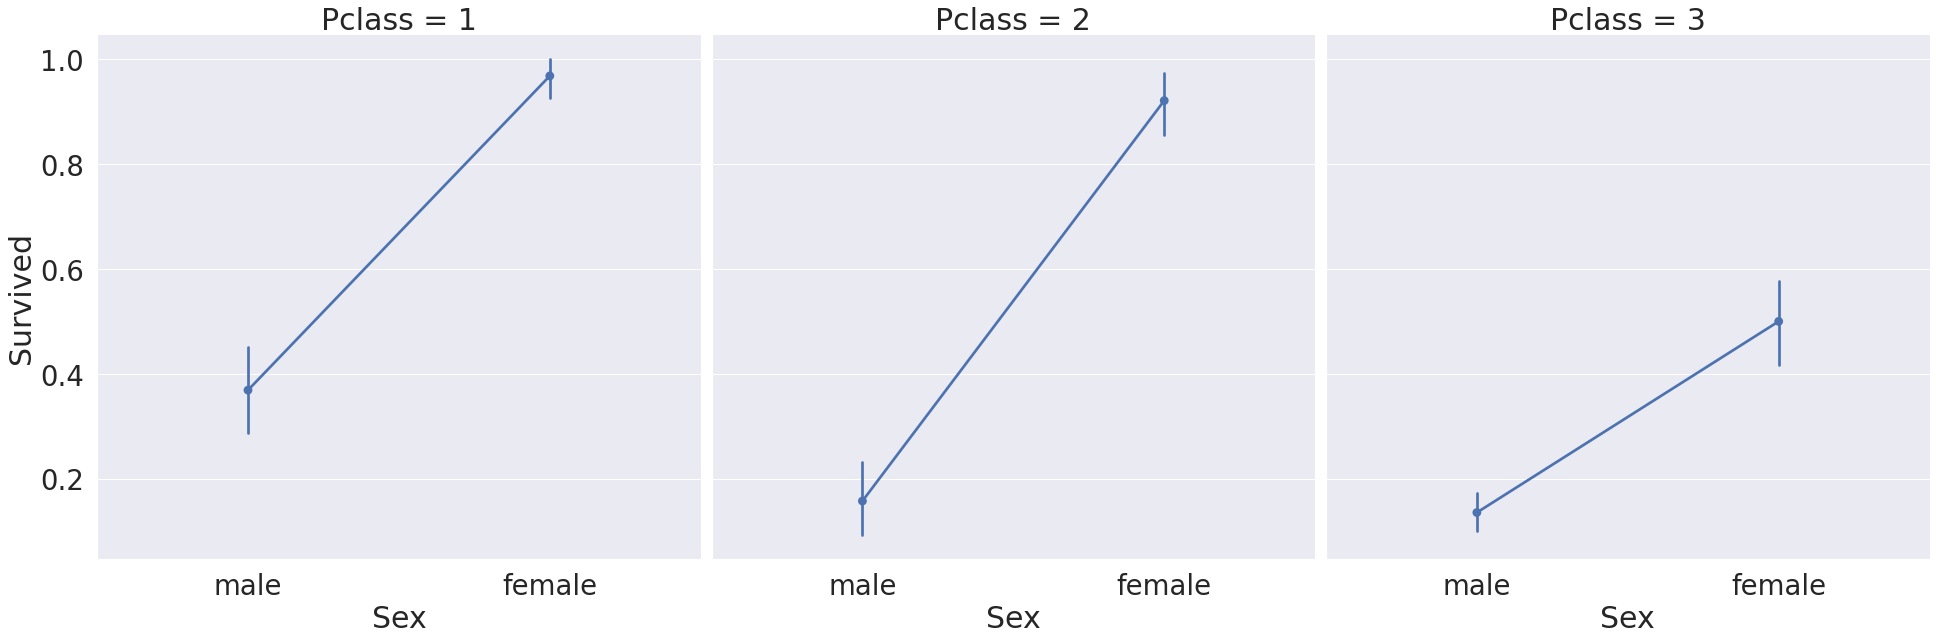

In [20]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',data=df_train,satureation=.5,size=9, aspect=1)

?
satureation=.5,
aspect=1

In [21]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


### {:.1f}

소수점 첫째자리까지 출력

### mean()

평균 계산

### format() 함수

- 필드에 있는 data또는 변형할 data를 지정된 형식에 맞추어 문자열로 변환해 주는 함수
- 주로 화면에 출력되는 데이터를 보기 좋은 형태로 만들기 위해 사용
- 함수로 출력된 데이터는 숫자가 아니라 문자의 형태

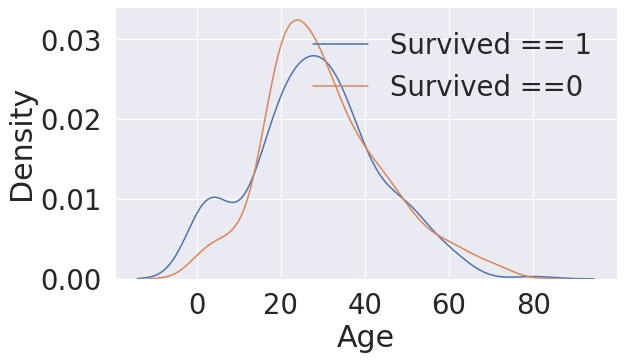

In [22]:
fix, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived == 1', 'Survived ==0'])
plt.show()

### legend()

여러 선이 그려진 그래프에 범례를 추가하는 함수

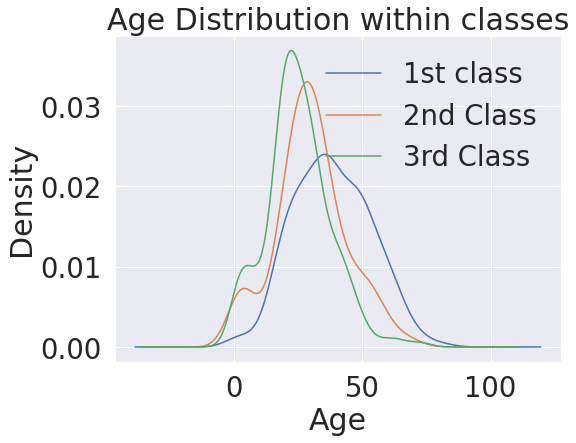

In [23]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class', '2nd Class', '3rd Class'])

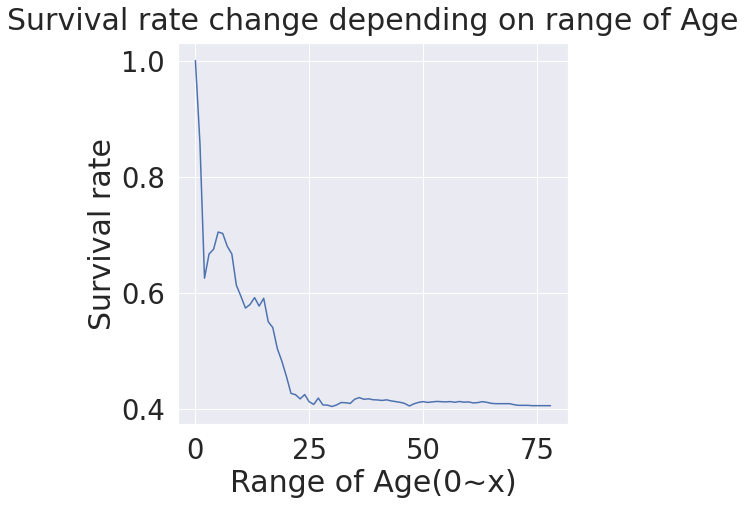

In [24]:
cummulate_survival_ratio = []
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

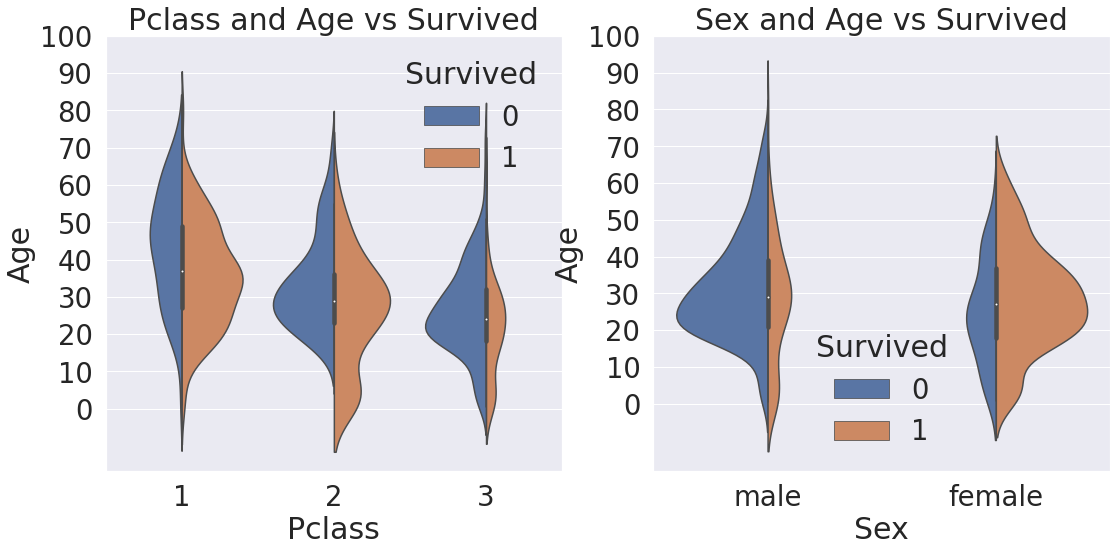

In [25]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue = "Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived", data=df_train, scale='count',split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### violinplot

세로 방향으로 커널 밀도 히스토그램을 그려주는 왼쪽과 오른쪽이 대칭이 되도록 하여 바이올린처럼 보인다.

### tick

플롯의 수평축 혹은 수직축에 나타나는 눈금

수평축의 눈금 → xtick

수직축의 눈금 → ytick

<AxesSubplot:xlabel='Embarked'>

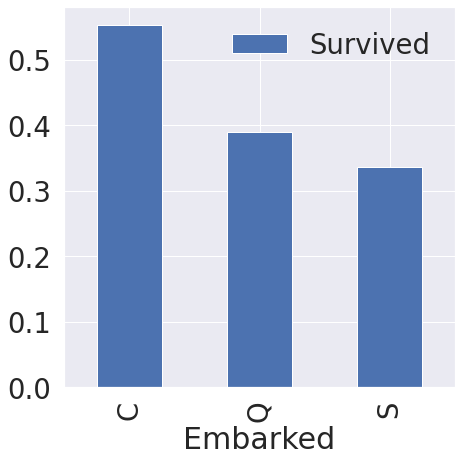

In [26]:
f, ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax)

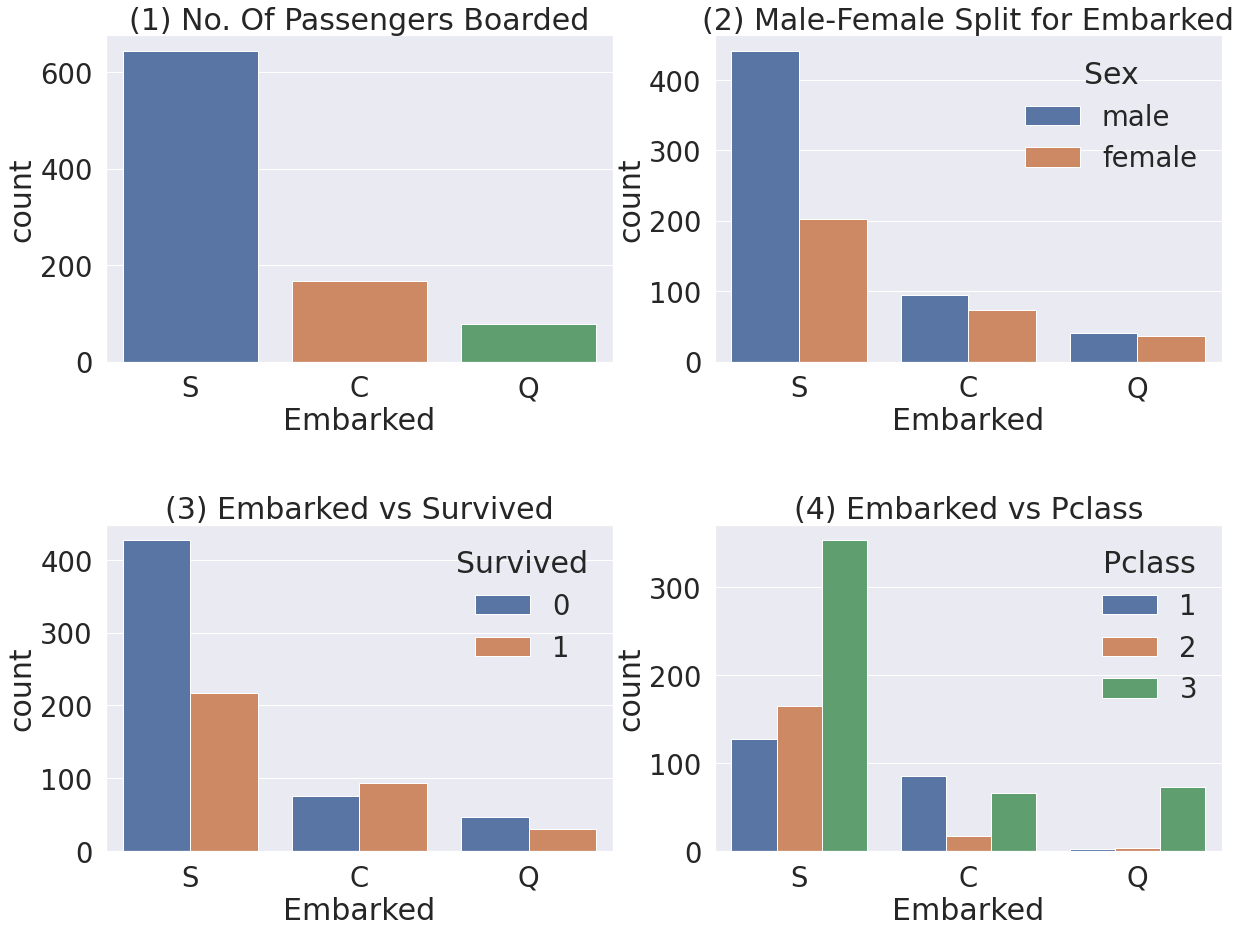

In [27]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=df_train,ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue = 'Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue = 'Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### plt.subplots_adjust() 메소드

메소드를 사용하여 서브 플롯 간 간격을 변경할 수 있다.

### wspace, hspace

subplot이 여러 개일 때 subplot간의 간격을 의미

In [28]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [29]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


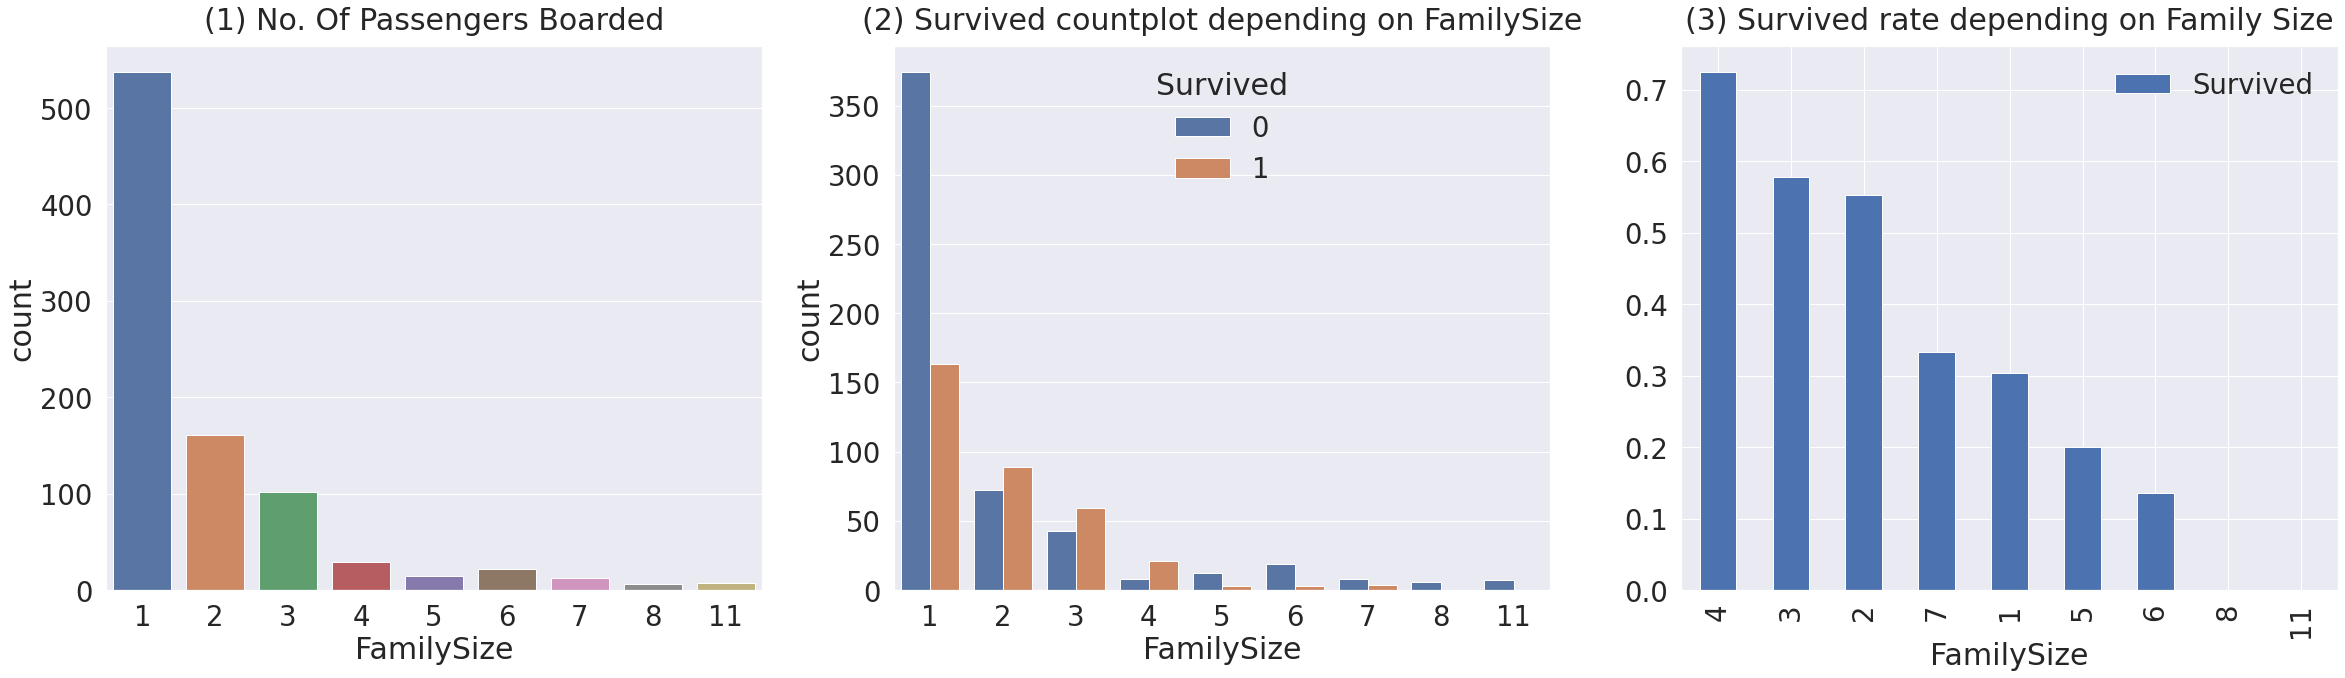

In [30]:
f,ax = plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train,ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y = 1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on Family Size', y = 1.02)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

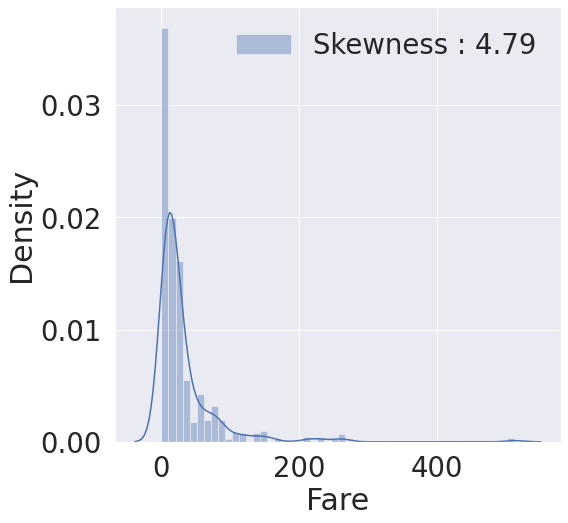

In [31]:
fig, ax = plt.subplots(1, 1, figsize = (8,8))
g = sns.distplot(df_train['Fare'], color='b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g = g.legend(loc='best')

In [32]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

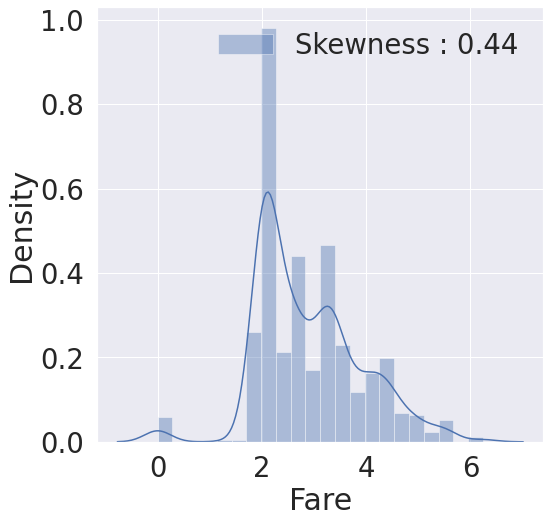

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g = g.legend(loc='best')

### loc

레전드의 위치를 대략적으로 설정하고자 한다면 키워드 입력변수인 loc를 사용

- ‘best’: 자동으로 계산하여 최적의 위치에 레전드를 위치시킨다.

### skew()

- Skewness를 측정한 값 기준으로 -2~+2는 치우침이 없는 데이터
- Skewed 데이터를 변환하는 이유는 꼬리에 있는 값을 모델에 제대로 학습시키기 위함이다.
- 2 미만은 Negative Skew, +2 초과는 Positive Skew
- Positive Skewness는 오른쪽에 꼬리를 가진(왼쪽에 데이터가 많은)형태이고, Negative Skewness는 왼쪽에 꼬리를 가진(오른쪽에 데이터가 많은) 형태

In [34]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


In [35]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

### value_counts()

종류별 개수